In [1]:
import h5py
import pylab as pl
import numpy as np
import matplotlib.colors as mpc
import networkx
import ipyvolume as ipv
import progressbar

In [2]:
sim = h5py.File('/data/cielo/simulations/LG1/LG1.hdf5', 'r')

In [3]:
Slist = h5py.File('SatelliteList_V2.h5', 'r')
Satellites = Slist['SatelliteList'][()]
Centrals = Slist['SatelliteCentral'][()]

In [4]:
# lest test each group. but first lets see what is contamination
#a = sim['SnapNumber_128/Groups/Contamination/PartType0/NumberInside5R200']
cen = np.unique(Centrals)

In [6]:
I1, I2, I5, I10 = [], [], [], []

for c in cen:
    group = sim['SnapNumber_128/SubGroups/GroupNumber'][c]
    n1 = sim['SnapNumber_128/Groups/Contamination/PartType5/NumberInside1R200'][group]
    n2 = sim['SnapNumber_128/Groups/Contamination/PartType5/NumberInside2R200'][group]
    n5 = sim['SnapNumber_128/Groups/Contamination/PartType5/NumberInside5R200'][group]
    n10 = sim['SnapNumber_128/Groups/Contamination/PartType5/NumberInside10R200'][group]
    I1.append(n1)
    I2.append(n2)
    I5.append(n5)
    I10.append(n10)
    
I1, I2, I5, I10 = np.array(I1), np.array(I2), np.array(I5), np.array(I10)

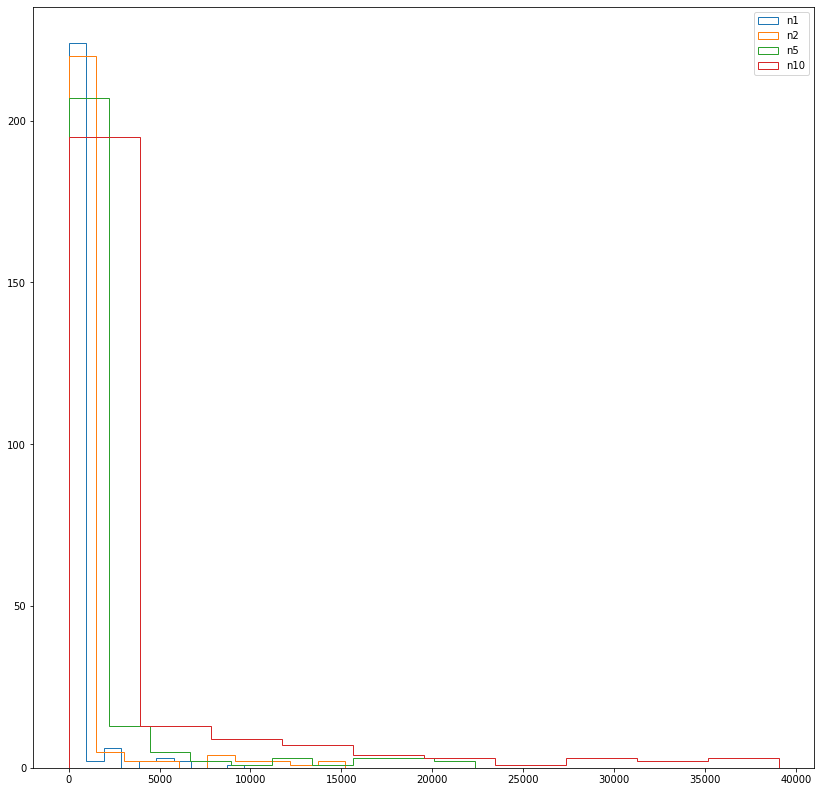

In [9]:
pl.figure(figsize=(14,14))

pl.hist(I1, label='n1', histtype='step')
pl.hist(I2, label='n2', histtype='step')
pl.hist(I5, label='n5', histtype='step')
pl.hist(I10, label='n10', histtype='step')

pl.legend(loc='best')

In [11]:
np.where(I1==0)[0].size, np.where(I2==0)[0].size, np.where(I5==0)[0].size, np.where(I10==0)[0].size

(161, 126, 84, 53)

In [12]:
I1, I5 = [], []
for i, c in enumerate(Centrals):
    group = sim['SnapNumber_128/SubGroups/GroupNumber'][c]
    n1 = sim['SnapNumber_128/Groups/Contamination/PartType5/NumberInside1R200'][group]
    n5 = sim['SnapNumber_128/Groups/Contamination/PartType5/NumberInside5R200'][group]
    if n1==0:
        I1.append(i)
    if n5==0: 
        I5.append(i)
I1, I5 = np.array(I1), np.array(I5)

In [13]:
sat1, cen1 = Satellites[I1], Centrals[I1]
sat5, cen5 = Satellites[I5], Centrals[I5]

In [14]:
sat1.size, sat5.size

(515, 263)

In [17]:
np.where(sat1==4470), np.where(sat5==4470)

((array([281]),), (array([76]),))

In [18]:
with h5py.File('SatelliteList_V2_cont1R200.h5', 'w') as f:
    f.create_dataset('SatelliteList', data=sat1)
    f.create_dataset('SatelliteCentral', data=cen1)

In [19]:
with h5py.File('SatelliteList_V2_cont5R200.h5', 'w') as f:
    f.create_dataset('SatelliteList', data=sat5)
    f.create_dataset('SatelliteCentral', data=cen5)